In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"lg64bit","key":"a5e234a3528b3431e31723fca21058a3"}'}

In [ ]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31           9185        312  1.0              
googleai/musiccaps                                              MusicCaps                                          793KB  2023-01-25 09:25:48           1843        188  0.9411765        
themrityunjaypathak/most-subscribed-1000-youtube-channels       Most Subscribed 1000 Youtube Channels               28KB  2023-01-21 14:42:05           2374         76  1.0              
nitishsharma01/olympics-124-years-datasettill-2020              O

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

In [ ]:
!unzip /content/animals10.zip

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import cv2

In [ ]:
dir = '/content/raw-img'

In [ ]:
classes = ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

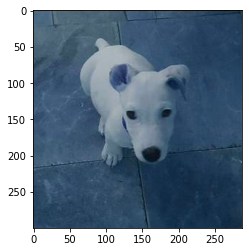

In [ ]:
for cl in classes:
    path = os.path.join(dir, cl)
    for im_path in os.listdir(path):
        img = cv2.imread(os.path.join(path, im_path))
        plt.imshow(img)
        break
    break

In [ ]:
img.shape

(300, 288, 3)

In [ ]:
dataset = []
for cl in classes:
    i=0
    cls_num = classes.index(cl)
    path = os.path.join(dir, cl)
    for img in os.listdir(path):
        try:
            img = cv2.imread(os.path.join(path, img))
            resized_img = cv2.resize(img, (224,224))
            dataset.append([resized_img, cls_num])
            if i >= 500:
              break
            i=i+1
        except Exception as e:
            pass

In [ ]:
len(dataset)

5010

In [ ]:
random.shuffle(dataset)
for i in dataset[:10]:
    print(classes[i[1]])

gallina
gallina
gallina
elefante
cavallo
pecora
pecora
pecora
elefante
ragno


In [ ]:
x =  []
y = []
for pic, label in dataset:
    x.append(pic)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
y = np.array(y)

In [ ]:
print(type(x),x.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (5010, 224, 224, 3)
<class 'numpy.ndarray'> (5010,)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4008, 224, 224, 3) (1002, 224, 224, 3) (4008,) (1002,)


In [ ]:
translate = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

In [ ]:
def img_show(pic, label, index):
    plt.figure(figsize=(15,2))
    plt.imshow(pic[index])
    plt.xlabel(translate[label[index]], fontsize=10)

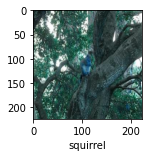

In [ ]:
img_show(x_test, y_test, 8)

In [ ]:
IMAGE_SHAPE = [224, 224]

In [ ]:
vgg = VGG16(input_shape= IMAGE_SHAPE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
predictions = Dense(10, activation='softmax')(x)

In [ ]:
model = Model(inputs = vgg.input, outputs = predictions)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
126/126 [==============================] - 29s 155ms/step - loss: 8.3168 - accuracy: 0.7972
Epoch 2/5
126/126 [==============================] - 19s 152ms/step - loss: 1.3203 - accuracy: 0.9586
Epoch 3/5
126/126 [==============================] - 19s 154ms/step - loss: 0.7911 - accuracy: 0.9753
Epoch 4/5
126/126 [==============================] - 20s 158ms/step - loss: 0.4166 - accuracy: 0.9843
Epoch 5/5
126/126 [==============================] - 20s 161ms/step - loss: 0.3434 - accuracy: 0.9880


In [ ]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 7s 194ms/step - loss: 7.6916 - accuracy: 0.8902


[7.691599369049072, 0.8902195692062378]

In [ ]:
p = model.predict(x_test)

32/32 [==============================] - 5s 157ms/step


In [ ]:
print(np.argmax(p[0]))

5


In [ ]:
translate[np.argmax(p[0])]

'cat'

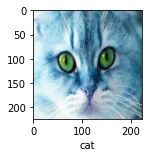

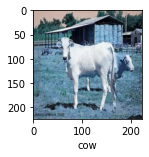

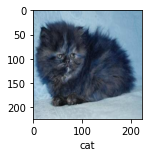

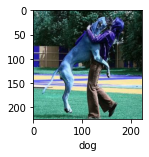

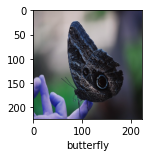

In [ ]:
for i in range(5):
    img_show(x_test, y_test, i)

In [ ]:
model.save('animal-10.hdf5')